# Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import panel as pn
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvas
pn.extension('tabulator')

import hvplot.pandas

# Chọn doanh nghiệp từ mã

In [2]:
business_code = input("Nhập mã doanh nghiệp: ")

Nhập mã doanh nghiệp:  PVS


# Tính Canslim

1. Import dữ liệu doanh nghiệp

In [16]:
df_CTKD = pd.read_csv("Data/"+business_code+"/CTKD_quy.csv", encoding='utf-16', sep='\t')
df_CDKT = pd.read_csv("Data/"+business_code+"/CDKT_quy.csv", encoding='utf-16', sep='\t')
df_CSTC = pd.read_csv("Data/"+business_code+"/CSTC_quy.csv", encoding='utf-16', sep='\t')

2. Tiền xử lí dữ liệu

In [17]:
df_CTKD.drop('Unnamed: 1', axis=1, inplace=True)
df_CTKD.drop('Unnamed: 2', axis=1, inplace=True)
df_CTKD.drop('Unnamed: 3', axis=1, inplace=True)

df_CDKT.drop('Unnamed: 1', axis=1, inplace=True)
df_CDKT.drop('Unnamed: 2', axis=1, inplace=True)
df_CDKT.drop('Unnamed: 3', axis=1, inplace=True)

df_CSTC.drop('Unnamed: 1', axis=1, inplace=True)
df_CSTC.drop('Unnamed: 2', axis=1, inplace=True)
df_CSTC.drop('Unnamed: 3', axis=1, inplace=True)

df_CTKD = df_CTKD.fillna(0)
df_CDKT = df_CDKT.fillna(0)
df_CSTC = df_CSTC.fillna(0)

3. Khởi tạo các mảng dữ liệu

In [18]:
col_canslim = df_CTKD.columns
ti_le_tang_truong = []
c=[]
a=[]

In [19]:
df_CTKD

,Unnamed: 0,Q4/2020,Q1/2021,Q2/2021,Q3/2021,Q4/2021,Q1/2022,Q2/2022,Q3/2022,Q4/2022
0,Giai đoạn,01/10-31/12,01/01-31/03,01/04-30/06,01/07-30/09,01/10-31/12,01/01-31/03,01/04-30/06,01/07-30/09,01/10-31/12
1,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất
2,Kiểm toán,Chưa kiểm toán,Chưa kiểm toán,Chưa kiểm toán,Chưa kiểm toán,Chưa kiểm toán,Chưa kiểm toán,Chưa kiểm toán,Chưa kiểm toán,Chưa kiểm toán
3,Công ty kiểm toán,0,0,0,0,0,0,0,0,0
4,Ý kiến kiểm toán,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,Doanh thu thuần về bán hàng và cung cấp dịch vụ,"5,107","2,614","3,063","3,980","4,570","3,769","3,811","3,502","5,331"
7,Giá vốn hàng bán,"5,265","2,435","2,802","3,776","4,316","3,577","3,661","3,301","5,004"
8,Lợi nhuận gộp về bán hàng và cung cấp dịch vụ,-158,179,261,204,254,193,151,201,327
9,Doanh thu hoạt động tài chính,123,75,64,51,87,86,144,136,123


4. Tiêu chí Sale

In [20]:
sales = df_CTKD.loc[6] #Doanh thu thuần hoạt động kinh doanh bảo hiểm
sales_dict= list(sales)
sales_dict.remove('Doanh thu thuần về bán hàng và cung cấp dịch vụ')
sales = []
for i in range(0,len(sales_dict)):
    sales.append(float(sales_dict[i].replace(',','.')))

# 1 Quý gần nhất (C) 
one_quy_gan_nhat_sale = []
one_quy_gan_nhat_sale.append(sales[len(sales)-5])
one_quy_gan_nhat_sale.append(sales[len(sales)-1])
tang_truong_c1= (one_quy_gan_nhat_sale[len(one_quy_gan_nhat_sale)-1]-one_quy_gan_nhat_sale[len(one_quy_gan_nhat_sale)-2])/one_quy_gan_nhat_sale[len(one_quy_gan_nhat_sale)-2]*100
ti_le_tang_truong.append(tang_truong_c1)
if(tang_truong_c1 < 0):
    c.append(0)
elif(tang_truong_c1 > 25):
    c.append(15)
else:
    c.append((tang_truong_c1/25)*15)

#1 Quý trước đó gần nhất (C) 
one_quy_truoc_gan_nhat_sale = []
one_quy_truoc_gan_nhat_sale.append(sales[len(sales)-6])
one_quy_truoc_gan_nhat_sale.append(sales[len(sales)-2])
tang_truong_c2= (one_quy_truoc_gan_nhat_sale[len(one_quy_truoc_gan_nhat_sale)-1]-one_quy_truoc_gan_nhat_sale[len(one_quy_truoc_gan_nhat_sale)-2])/one_quy_truoc_gan_nhat_sale[len(one_quy_truoc_gan_nhat_sale)-2]*100
ti_le_tang_truong.append(tang_truong_c2)
if(tang_truong_c2 < 0):
    c.append(0)
elif(tang_truong_c2 > 25):
    c.append(10)
else:
    c.append((tang_truong_c2/25)*10)

#Trailing 12 tháng gần nhất (A)
trailing_gan_sum1_p1 = 0
trailing_gan_sum2_p1 = 0
for i in range(1,5):
    trailing_gan_sum1_p1 += sales[i]
for i in range(5,len(sales)):
    trailing_gan_sum2_p1 += sales[i]
tang_truong_a1 = (trailing_gan_sum2_p1-trailing_gan_sum1_p1)/trailing_gan_sum1_p1*100
ti_le_tang_truong.append(tang_truong_a1)
if(tang_truong_a1 < 0):
    a.append(0)
elif(tang_truong_a1 > 20):
    a.append(10)
else:
    a.append((tang_truong_a1/20)*10)

#Trailing 12 tháng gần nhất trước đó (A)
trailing_truoc_sum1_p2 = 0
trailing_truoc_sum2_p2 = 0
for i in range(0,4):
    trailing_truoc_sum1_p2 += sales[i]
for i in range(4,len(sales)-1):
    trailing_truoc_sum2_p2 += sales[i]
tang_truong_a2 = (trailing_truoc_sum2_p2-trailing_truoc_sum1_p2)/trailing_truoc_sum1_p2*100
ti_le_tang_truong.append(tang_truong_a2)
if(tang_truong_a2 < 0):
    a.append(0)
elif(tang_truong_a2 > 20):
    a.append(5)
else:
    a.append((tang_truong_a2/20)*5)

5. Tiêu chí EPS

In [21]:
eps = df_CTKD.loc[19] #'Lãi cơ bản trên cổ phiếu (VNÐ)'
eps_dict= list(eps)
eps_dict.remove('Lãi cơ bản trên cổ phiếu (VNÐ)')
eps = []
for i in range(0,len(eps_dict)):
    eps.append(float(eps_dict[i]))

#1 Quý gần nhất (C)
one_quy_gan_nhat_eps = []
one_quy_gan_nhat_eps.append(eps[len(eps)-5])
one_quy_gan_nhat_eps.append(eps[len(eps)-1])
tang_truong_c3= (one_quy_gan_nhat_eps[len(one_quy_gan_nhat_eps)-1]-one_quy_gan_nhat_eps[len(one_quy_gan_nhat_eps)-2])/one_quy_gan_nhat_eps[len(one_quy_gan_nhat_eps)-2]*100
ti_le_tang_truong.append(tang_truong_c3)
if(tang_truong_c3 < 0):
    c.append(0)
elif(tang_truong_c3 > 25):
    c.append(20)
else:
    c.append((tang_truong_c3/25)*20)
    
#1 Quý trước đó gần nhất (C) 
one_quy_truoc_gan_nhat_eps = []
one_quy_truoc_gan_nhat_eps.append(eps[len(eps)-6])
one_quy_truoc_gan_nhat_eps.append(eps[len(eps)-2])
tang_truong_c4= (one_quy_truoc_gan_nhat_eps[len(one_quy_truoc_gan_nhat_eps)-1]-one_quy_truoc_gan_nhat_eps[len(one_quy_truoc_gan_nhat_eps)-2])/one_quy_truoc_gan_nhat_eps[len(one_quy_truoc_gan_nhat_eps)-2]*100
ti_le_tang_truong.append(tang_truong_c4)
if(tang_truong_c4 < 0):
    c.append(0)
elif(tang_truong_c4 > 25):
    c.append(15)
else:
    c.append((tang_truong_c4/25)*15)

#Trailing 12 tháng gần nhất (A)
trailing_gan_sum1_p1_eps = 0
trailing_gan_sum2_p1_eps = 0
for i in range(1,5):
    trailing_gan_sum1_p1_eps += eps[i]
for i in range(5,len(eps)):
    trailing_gan_sum2_p1_eps += eps[i]
tang_truong_a3 = (trailing_gan_sum2_p1_eps-trailing_gan_sum1_p1_eps)/trailing_gan_sum1_p1_eps*100
ti_le_tang_truong.append(tang_truong_a3)
if(tang_truong_a3 < 0):
    a.append(0)
elif(tang_truong_a3 > 20):
    a.append(15)
else:
    a.append((tang_truong_a3/20)*15)

#Trailing 12 tháng gần nhất trước đó (A)
trailing_truoc_sum1_p2_eps = 0
trailing_truoc_sum2_p2_eps = 0
for i in range(0,4):
    trailing_truoc_sum1_p2_eps += eps[i]
for i in range(4,len(eps)-1):
    trailing_truoc_sum2_p2_eps += eps[i]
tang_truong_a4 = (trailing_truoc_sum2_p2_eps-trailing_truoc_sum1_p2_eps)/trailing_truoc_sum1_p2_eps*100
ti_le_tang_truong.append(tang_truong_a4)
if(tang_truong_a4 < 0):
    a.append(0)
elif(tang_truong_a4 > 20):
    a.append(10)
else:
    a.append((tang_truong_a4/20)*10)

6. Visualization kết quả

In [22]:
tieu_chi = ['1 Quý gần nhất (C)','1 Quý trước đó gần nhất (C)','Trailing 12 tháng gần nhất (A)','Trailing 12 tháng gần nhất trước đó (A)']
sale = ti_le_tang_truong[0:4]
eps_p = ti_le_tang_truong[4:len(ti_le_tang_truong)]
list_nan = [0,0,0,0]
list_nan2 = [0,0]
sale = sale + list_nan
eps_p = list_nan + eps_p
tieuchi= tieu_chi+tieu_chi
c_a=c[0:2]+a[0:2]+c[2:len(c)]+a[2:len(a)]

df_canslim = pd.DataFrame(tieuchi, columns=['TieuChi'])
df_canslim['Sale'] = sale
df_canslim['EPS'] = eps_p
df_canslim['Diem'] = c_a

idf_canslim = df_canslim.interactive()

#point_slider = pn.widgets.FloatSlider(name='Tỉ lệ tăng trưởng', start=0, end=max(c_a), step=0.1, value=max(c_a))

yaxis_canslim = pn.widgets.RadioButtonGroup(
name='Y axis', 
options=['Sale', 'EPS',],
button_type='success'
)

canslim_pipeline = (
idf_canslim[
    #(idf_canslim.Diem <= point_slider) &
    (idf_canslim.TieuChi.isin(tieu_chi))
]
.groupby(['TieuChi', 'Diem'])[yaxis_canslim].mean()
.to_frame()
.reset_index()
.sort_values(by='Diem')  
.reset_index(drop=True)
)

canslim_plot = canslim_pipeline.hvplot.bar(x = 'Diem', by='TieuChi', y=yaxis_canslim,line_width=2, title="Canslim: "+str(round(sum(c_a),2))+"/100",stacked=True)
#canslim_pipeline_table = canslim_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 

In [23]:
loai_tieu_chi =[]
for i in range(0,9):
    if(i>4):
        loai_tieu_chi.append('Tiêu chí EPS')
    elif(i==4):
        loai_tieu_chi.append('')
    else:
        loai_tieu_chi.append('Tiêu chí SALE')
df_canslim_table = pd.DataFrame(loai_tieu_chi, columns=[''])
df_canslim_table[' '] = tieuchi[0:4]+['']+tieuchi[4:len(tieuchi)]
col_null = '  '
col_null_data =['','','','','','','','','']
for i in range(0,8):
    df_canslim_table[col_null] = col_null_data
    col_null += ' '
df_canslim_table['Tỉ lệ tăng trưởng'] = ti_le_tang_truong[0:4]+['']+ti_le_tang_truong[4:len(ti_le_tang_truong)]
df_canslim_table['C'] = c[0:2] + ['','',''] + c[2:len(c)] + ['','']
df_canslim_table['A'] = ['',''] + a[0:2] + ['','',''] + a[2:len(a)]
df_canslim_table['Tổng điểm'] = ['','','','',round(sum(c_a),2),'','','','']
col_canslim = list(col_canslim)
try:
    col_canslim.remove('Unnamed: 0')
except:
    col_canslim = col_canslim

df_canslim_table.iloc[0,5] = col_canslim[len(col_canslim)-5]+': '+ str(sales[len(sales)-5])
df_canslim_table.iloc[0,6] = col_canslim[len(col_canslim)-1]+': '+ str(sales[len(sales)-1])
df_canslim_table.iloc[1,5] = col_canslim[len(col_canslim)-6]+': '+ str(sales[len(sales)-6])
df_canslim_table.iloc[1,6] = col_canslim[len(col_canslim)-2]+': '+ str(sales[len(sales)-2])

df_canslim_table.iloc[5,5] = col_canslim[len(col_canslim)-5]+': '+ str(eps[len(eps)-5])
df_canslim_table.iloc[5,6] = col_canslim[len(col_canslim)-1]+': '+ str(eps[len(eps)-1])
df_canslim_table.iloc[6,5] = col_canslim[len(col_canslim)-6]+': '+ str(eps[len(eps)-6])
df_canslim_table.iloc[6,6] = col_canslim[len(col_canslim)-2]+': '+ str(eps[len(eps)-2])
for i in range(2,10):
    df_canslim_table.iloc[2,i] = col_canslim[i-1]+': '+str(sales[i-1])
    df_canslim_table.iloc[3,i] = col_canslim[i-2]+': '+str(sales[i-2])
    df_canslim_table.iloc[7,i] = col_canslim[i-1]+': '+str(eps[i-1])
    df_canslim_table.iloc[8,i] = col_canslim[i-2]+': '+str(eps[i-2])
    
canslim_pipeline_table = df_canslim_table.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')

In [24]:
canslim_pipeline_table

Tabulator(page_size=10, pagination='remote', sizing_mode='stretch_width', value=              ...)

# Tính 4M

1. Import dữ liệu doanh nghiệp

In [25]:
df_CTKD = pd.read_csv("Data/"+'BVH'+"/CTKD_nam.csv", encoding='utf-16', sep='\t')
df_CDKT = pd.read_csv("Data/"+'BVH'+"/CDKT_nam.csv", encoding='utf-16', sep='\t')
df_CSTC = pd.read_csv("Data/"+'BVH'+"/CSTC_nam.csv", encoding='utf-16', sep='\t')

2. Tiền xử lí dữ liệu

In [26]:
df_CTKD.drop('Unnamed: 1', axis=1, inplace=True)
df_CTKD.drop('Unnamed: 2', axis=1, inplace=True)
df_CTKD.drop('Unnamed: 3', axis=1, inplace=True)

df_CDKT.drop('Unnamed: 1', axis=1, inplace=True)
df_CDKT.drop('Unnamed: 2', axis=1, inplace=True)
df_CDKT.drop('Unnamed: 3', axis=1, inplace=True)

df_CSTC.drop('Unnamed: 1', axis=1, inplace=True)
df_CSTC.drop('Unnamed: 2', axis=1, inplace=True)
df_CSTC.drop('Unnamed: 3', axis=1, inplace=True)

df_CTKD = df_CTKD.fillna(0)
df_CDKT = df_CDKT.fillna(0)
df_CSTC = df_CSTC.fillna(0)

3. Khởi tạo các mảng dữ liệu và các hàm tính toán cần thiết

In [27]:
diem_tp = []

def chuyen_doi_float(type_data):
    type_data_dict= list(type_data)
    
    try:
        while(1):
            type_data_dict.remove('')
    except:
        type_data_dict = type_data_dict
    
    try:
        while(1):
            type_data_dict.remove('VNĐ')
    except:
        type_data_dict = type_data_dict
    
    type_data = []
        
    for i in range(0,len(type_data_dict)):
        type_data.append(float(type_data_dict[i].replace(',','')))
    return type_data

def calc(rate_something, type_data,tham_chieu,ty_trong):
    k = 1 
    for i in range(0,3):
        rate_something.append(round(npf.rate(k,0,-(type_data[len(type_data) - k -2]),(type_data[len(type_data)-2]))*100,0))
        k+=2
    
    sum_tp = 0
    for i in range(0,len(rate_something)):
        if(rate_something[i] >= tham_chieu):
            sum_tp += 30
        else:
            if(i==1):
                sum_tp += (rate_something[i]/tham_chieu)*40
            else:
                sum_tp += (rate_something[i]/tham_chieu)*30
    #sum_tp = sum_tp*(ty_trong/100)
    diem_tp.append(sum_tp*(ty_trong/100))

def cac_rate(rate_something, type_data, tham_chieu,ty_trong):
    #f(type(type_data) != list):
    type_data = chuyen_doi_float(type_data)
    
    calc(rate_something, type_data,tham_chieu,ty_trong)
    return type_data

In [28]:
df_CTKD

,Unnamed: 0,2016,2017,2018,2019,2020,2021,2022
0,Giai đoạn,01/01-31/12,01/01-31/12,01/01-31/12,01/01-31/12,01/01-31/12,01/01-31/12,01/01-31/12
1,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất,Hợp nhất
2,Kiểm toán,Kiểm toán,Kiểm toán,Kiểm toán,Kiểm toán,Kiểm toán,Kiểm toán,Chưa kiểm toán
3,Công ty kiểm toán,EY,EY,EY,EY,EY,EY,0
4,Ý kiến kiểm toán,Chấp nhận toàn phần,Chấp nhận toàn phần,Chấp nhận toàn phần,Chấp nhận toàn phần,Chấp nhận toàn phần,Chấp nhận toàn phần,0
5,0,0,0,0,0,0,0,0
6,Doanh thu thuần hoạt động kinh doanh bảo hiểm,"19,009","24,042","29,066","33,309","34,524","36,828","40,699"
7,Tổng chi trực tiếp hoạt động kinh doanh bảo hiểm,"17,707","21,998","30,053","32,376","34,199","34,428","42,907"
8,Lợi nhuận gộp hoạt động kinh doanh bảo hiểm,"1,303","2,044",-988,934,325,"2,400","-2,208"
9,Lợi nhuận thuần hoạt động kinh doanh bảo hiểm,"-1,822",536,"-2,685",-765,"-3,431","2,400","-2,208"


4. Tính toán các chỉ số

In [29]:
rate_sale = []
sale = df_CTKD.loc[6] #Doanh thu thuần hoạt động kinh doanh bảo hiểm
sale = list(sale)
sale.remove('Doanh thu thuần hoạt động kinh doanh bảo hiểm')
sale = cac_rate(rate_sale,sale,20,15)

rate_eps = []
eps = df_CSTC.loc[6] #Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)
eps = list(eps)
eps.remove('Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)')
eps = cac_rate(rate_eps,eps,20,20)

rate_bvps = []
bvps = df_CSTC.loc[7] #Giá trị sổ sách của cổ phiếu (BVPS)
bvps = list(bvps)
bvps.remove('Giá trị sổ sách của cổ phiếu (BVPS)')
bvps = cac_rate(rate_bvps,bvps,15,5)

rate_opc = []
opc = df_CTKD.loc[17] #Lưu chuyển tiền thuần từ hoạt động kinh doanh
opc = list(opc)
opc.remove('Lưu chuyển tiền thuần từ hoạt động kinh doanh')
opc_convert  = []
for i in range(0,len(opc)):
    opc_convert.append(opc[i].replace('.',''))
opc = cac_rate(rate_opc,opc_convert,15,15)

rate_effectiveness = []
tai_san = df_CDKT.loc[19] #Tổng cộng tài sản
tai_san = list(tai_san)
tai_san.remove('Tổng cộng tài sản')
tai_san = chuyen_doi_float(tai_san)
effectiveness = []
for i in range(0,len(tai_san)):
    effectiveness.append(sale[i]/tai_san[i])
calc(rate_effectiveness,effectiveness,10,5)

rate_effciency = []
loi_nhuan = df_CTKD.loc[14] #Lợi nhuận sau thuế thu nhập doanh nghiệp
loi_nhuan = list(loi_nhuan)
loi_nhuan.remove('Lợi nhuận sau thuế thu nhập doanh nghiệp')
loi_nhuan = chuyen_doi_float(loi_nhuan)
effciency = []
for i in range(0,len(loi_nhuan)):
    effciency.append(loi_nhuan[i]/sale[i])
calc(rate_effciency,effciency,10,5)

rate_productitivty = []
productitivty = []
for i in range(0,len(loi_nhuan)):
    productitivty.append(opc[i]/loi_nhuan[i])
calc(rate_productitivty,productitivty,10,5)

rate_roa = []
von = df_CDKT.loc[29] #Tổng cộng nguồn vốn
von = list(von)
von.remove('Tổng cộng nguồn vốn')
von = chuyen_doi_float(von)
roa = []
for i in range(0,len(loi_nhuan)):
    roa.append((loi_nhuan[i]/von[i])*100)
calc(rate_roa,roa,15,10)

rate_roe = []
von_chu_so_huu = df_CDKT.loc[24] #Vốn chủ sở hữu
von_chu_so_huu = list(von_chu_so_huu)
von_chu_so_huu.remove('Vốn chủ sở hữu')
von_chu_so_huu = chuyen_doi_float(von_chu_so_huu)
roe = []
for i in range(0,len(loi_nhuan)):
    roe.append((loi_nhuan[i]/von_chu_so_huu[i])*100)
calc(rate_roe,roe,20,5)

rate_roic = []
loi_nhuan_ctyme = df_CTKD.loc[15] #Lợi nhuận sau thuế của cổ đông Công ty mẹ
loi_nhuan_ctyme = list(loi_nhuan_ctyme)
loi_nhuan_ctyme.remove('Lợi nhuận sau thuế của cổ đông Công ty mẹ')
loi_nhuan_ctyme = chuyen_doi_float(loi_nhuan_ctyme)
roic = []
for i in range(0,len(loi_nhuan_ctyme)):
    roic.append((loi_nhuan_ctyme[i]/von[i])*100)
calc(rate_roic,roic,15,15)

5. Visualization kết quả

In [30]:
chi_so = ['Sales','EPS','BVPS','OPC LCDTKD','Effectiveness','Effciency','Productitivty','ROA','ROE','ROIC']
ty_trong_tp = [15,20,5,15,5,5,5,10,5,15]
df_4m = pd.DataFrame({
'group': ['Tỷ trọng','Điểm thành phần'],
'Sales Growth Rate': [ty_trong_tp[0], diem_tp[0]],
'EPS Growth Rate': [ty_trong_tp[1], diem_tp[1]],
'BVPS Growth Rates': [ty_trong_tp[2], diem_tp[2]],
'Tăng trưởng OPC LCDTKD': [ty_trong_tp[3], diem_tp[3]],
'Nợ dài hạn năm gần nhất': [10, 10],
'Effectiveness': [ty_trong_tp[4], diem_tp[4]],
'Effciency': [ty_trong_tp[5], diem_tp[5]],
'Productitivty': [ty_trong_tp[6], diem_tp[6]],
'ROA': [ty_trong_tp[7], diem_tp[7]],
'ROE': [ty_trong_tp[8], diem_tp[8]],
'ROIC': [ty_trong_tp[9], diem_tp[9]],
})
def visualization_4m():
    categories=list(df_4m)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    plt.yticks([-20,-15,-10,-5,0,5,10,15,20], ["-20","-15","-10","-5","0","5","10","15","20"], color="grey", size=7)
    plt.ylim(-20,20)

    values=df_4m.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Tỷ trọng")
    ax.fill(angles, values, 'b', alpha=0.1)

    values=df_4m.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Điểm thành phần")
    ax.fill(angles, values, 'r', alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.savefig(business_code+'.png', bbox_inches='tight')
    #return plt.show()

In [34]:
df_4m

,group,Sales Growth Rate,EPS Growth Rate,BVPS Growth Rates,Tăng trưởng OPC LCDTKD,Nợ dài hạn năm gần nhất,Effectiveness,Effciency,Productitivty,ROA,ROE,ROIC
0,Tỷ trọng,15.000,20.0,5.000000,15.0,10,5.0,5.00,5.00,10.000000,5.000,15.0
1,Điểm thành phần,7.125,16.2,2.733333,8.1,10,-2.8,3.15,-5.45,6.333333,3.475,8.4


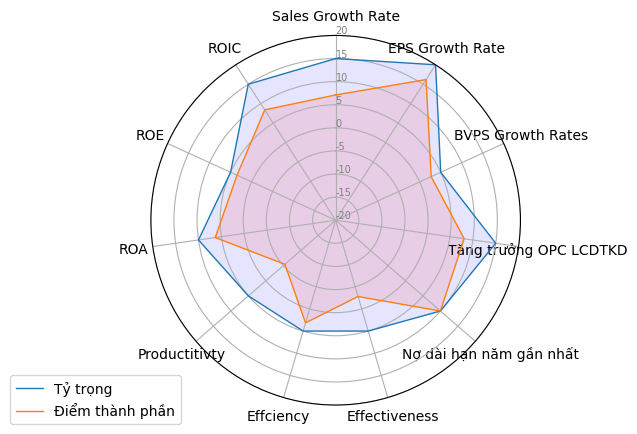

In [35]:
import os
if os.path.exists(business_code+'.png'):
  os.remove(business_code+'.png')
visualization_4m()

In [36]:
chiso=chi_so+chi_so+chi_so
df_4m2 = pd.DataFrame(chiso, columns=["ChiSo"])
null_list = [0,0,0,0,0,0,0,0,0,0]
nam_list1 = [1,1,1,1,1,1,1,1,1,1]
nam_list3 = [3,3,3,3,3,3,3,3,3,3]
nam_list5 = [5,5,5,5,5,5,5,5,5,5]
nam_1 = [rate_sale[0],rate_eps[0],rate_bvps[0],rate_opc[0],rate_effectiveness[0],rate_effciency[0],rate_productitivty[0],rate_roa[0],rate_roe[0],rate_roic[0]]
nam_3 = [rate_sale[1],rate_eps[1],rate_bvps[1],rate_opc[1],rate_effectiveness[1],rate_effciency[1],rate_productitivty[1],rate_roa[1],rate_roe[1],rate_roic[1]] 
nam_5 = [rate_sale[2],rate_eps[2],rate_bvps[2],rate_opc[2],rate_effectiveness[2],rate_effciency[2],rate_productitivty[2],rate_roa[2],rate_roe[2],rate_roic[2]]
df_4m2['Nam'] = nam_list1 + nam_list3 + nam_list5
df_4m2['TrongSo'] = nam_1 + nam_3 + nam_5

idf_4m = df_4m2.interactive()

year_slider = pn.widgets.IntSlider(name='Year slider', start=1, end=5, step=2, value=1)
    
vis4m_pipeline = (
idf_4m[
    (idf_4m.Nam <= year_slider) &
    (idf_4m.ChiSo.isin(chi_so))
]
.groupby(['ChiSo', 'Nam'])['TrongSo'].mean()
.to_frame()
.reset_index()
.sort_values(by='Nam')  
.reset_index(drop=True)
)

vis4m_plot = vis4m_pipeline.hvplot.bar(x = 'Nam', by='ChiSo',line_width=2, title="4M: "+str(sum(diem_tp)+10)+'/100',rot=90)

In [37]:
vis4m_plot

# Khởi tạo server local hiển thị Dashboard

In [207]:
template = pn.template.FastListTemplate(
    title='Phân tích doanh nghiệp', 
    sidebar=[pn.pane.Markdown("# Đồ án môn Hệ thống thông tin kế toán - IS232.N12.HTCL"), 
             pn.pane.Markdown("#### Giảng viên hướng dẫn : Đỗ Duy Thanh"),
             pn.pane.Markdown("#### Nhóm sinh viên Thực hiện :"),
             pn.pane.Markdown("#### 19521987 - Huỳnh Văn Pháp"),
             pn.pane.Markdown("#### 19522411 - Phan Thành Bảo Trọng")   
             ],
    main=[pn.Row(pn.Column(yaxis_canslim, 
                           canslim_plot.panel(width=700), margin=(0,25)), 
                 canslim_pipeline_table), 
          pn.Row(pn.Column(pn.pane.PNG(business_code+'.png', sizing_mode='scale_both'), margin=(0,25)), 
                 pn.Column(year_slider, vis4m_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
template.servable();